<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kernel-Density-estimates" data-toc-modified-id="Kernel-Density-estimates-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kernel Density estimates</a></span><ul class="toc-item"><li><span><a href="#Nonparametric-Density-Estimation" data-toc-modified-id="Nonparametric-Density-Estimation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Nonparametric Density Estimation</a></span><ul class="toc-item"><li><span><a href="#Histogram" data-toc-modified-id="Histogram-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Histogram</a></span></li><li><span><a href="#Kernel-Estimator" data-toc-modified-id="Kernel-Estimator-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Kernel Estimator</a></span></li><li><span><a href="#K-Nearest-Neighbors(KNN)" data-toc-modified-id="K-Nearest-Neighbors(KNN)-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>K-Nearest Neighbors(KNN)</a></span></li></ul></li><li><span><a href="#Multivariate-density-estimation" data-toc-modified-id="Multivariate-density-estimation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Multivariate density estimation</a></span></li><li><span><a href="#Classification-using-density-estimations" data-toc-modified-id="Classification-using-density-estimations-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Classification using density estimations</a></span><ul class="toc-item"><li><span><a href="#KNN-classification" data-toc-modified-id="KNN-classification-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>KNN classification</a></span></li></ul></li><li><span><a href="#Voronoi-tesselation" data-toc-modified-id="Voronoi-tesselation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Voronoi tesselation</a></span></li><li><span><a href="#Nonparametric-Regression" data-toc-modified-id="Nonparametric-Regression-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Nonparametric Regression</a></span></li></ul></li></ul></div>

# Kernel Density estimates
## Nonparametric Density Estimation
In the previous chapters, we have been doing what is known as parametric methods, i.e we have assumed some paramter or model our data has come from and fitting to gain some paramter. However if the assumption of the model is not a good assumption then you won't get a good result. There are also things known as semi-parametric models, which is made up of many small parametric models(Like gaussian mixture models), which I will discuss later, to counter for this. The only problem with these density estimations is they tend to be memory alogirthms, i.e need to keep all the data to predict new points. This can be computially and memory intensive. 


### Histogram

Nonparametric methods is simply building model based entriely on the data it's self, rather than reliying on any underlying model. One example of this is is typical histogram which estatimes the density function based on number of data points in a certain box or bin of certain width h. In the end with have some probaility distrubtion:

$$p(x) = \frac{\text{Number x points falling in this bin}}{Nh} $$

where N is the number of data points. Our density estimation can vary quite a lot depending on this width as seen in the example below.



In [1]:
from sklearn import datasets
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

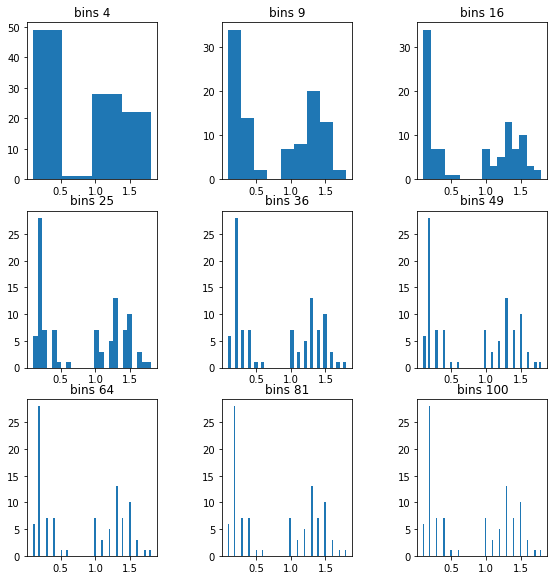

In [2]:
iris = datasets.load_iris()
#only the first feature and 2 different samples
X=iris.data[:, 3]
Y=iris.target
X=X[Y!=2] 
Y=Y[Y!=2] 

fig, axes = plt.subplots(3,3,figsize=(8, 8))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2,wspace=0.5)
#increase bins of power of 2
num_bins = [ x**2 for x in range(2,len(axes.ravel())+2) ]

#Plot Histogram of varying number of bins
#this changes bin width
for ax,bN in zip(axes.ravel(),num_bins):
	ax.hist(X, bins=bN)
	ax.set_title("bins {}".format(bN))



As you can see if you make you width too much then you don't have a very good estimation and just have a bar at each data point. To large a width and just get a giant blob. 


### Kernel Estimator
There are improvments in the histogram such as the naive estimator which uses a window function:

$$ p(x) = \frac{1}{Nh} \sum_i^N w(\frac{x-x_i}{h})$$

where the window function w equals:

$$ w(a) = \begin{cases}
    1,& \text{if } |a| < 1/2 \\
    0,              & \text{otherwise}
\end{cases}$$

Here it checks a point x and then sums up all the surround points which is close enough to it by some distance. This however is still very discontious density function. If we replace the window function by some kernal K, we can obtain smoother density estimators:


$$ p(x) = \frac{1}{Nh} \sum_i^N K(\frac{x-x_i}{h})$$


where for example we can use a gaussian kernal:

$$K(a) = \frac{1}{\sqrt{2\pi}}exp(-\frac{a^2}{2}) $$

Using this we can plot a new density estimation with varying width length.

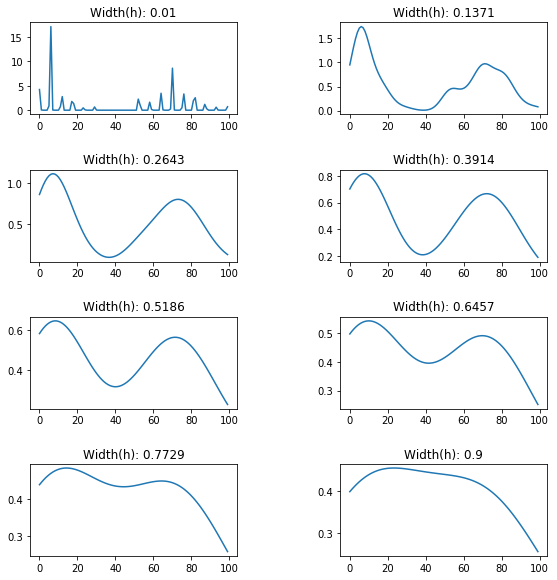

In [3]:
#now try with  kernal
from scipy.stats import gaussian_kde
#can also import sklearn.neighbors.kernel density
x = np.linspace(min(X), max(X),100)
 
#Varying length of gaussian kernals
width = np.linspace(min(X)*0.1, max(X)*0.5,8);


fig, axes = plt.subplots(4,2,figsize=(8, 8))
fig.tight_layout()
fig.subplots_adjust(hspace=0.6,wspace=0.5)


for ax,h in zip(axes.ravel(),width):
    #build model
    kmodel = gaussian_kde(X,h)
    #output pdf using x linspace data
    pdfmodel = kmodel(x)
    ax.plot(pdfmodel)
    ax.set_title("Width(h): {}".format(round(h,4)))

As it can seen the desntiy estimation is a lot smoother than a histogram. Again though care must be made with the width or can give very wrong estimation. We can check how good this kernal estimation is or how good varying width of kernals are by comparing the built model with the actual model using entopy formula or what is known as the KL divergence:

KL Divergence1 0.0232033050583
KL Divergence2 0.0831227683084


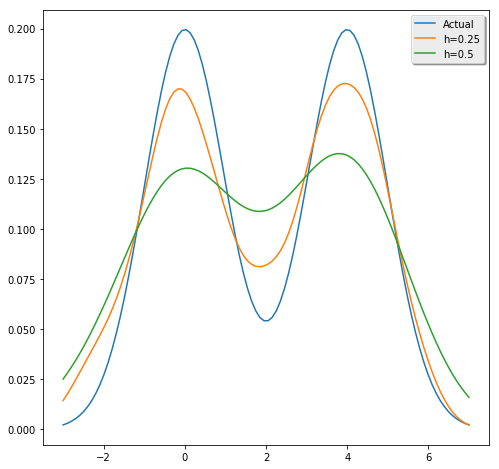

In [4]:
from scipy.stats import entropy
from scipy.stats import norm

#make training data for model building
#one set of data gaussian with 0 mean and std 1 
#second gaus of mean 4 and std 1
G1 = np.append(np.random.normal(0, 1, 50), np.random.normal(4,1, 50))

#Set up  data points
x=np.linspace(-3, 7,100)

#Make actually gaussian model of data
M = 0.5*norm.pdf(x,0,1) + 0.5*norm.pdf(x,4,1)

#kernal estimate length 0.25 and 0.5
kmodelout = gaussian_kde(G1,0.25)(x)
kmodelout2 = gaussian_kde(G1,0.5)(x)

print("KL Divergence1", entropy(M,kmodelout))
print("KL Divergence2", entropy(M,kmodelout2))

fig, axes = plt.subplots(figsize=(8, 8))
real, = axes.plot(x,M, label = "Actual")
pdict1, = axes.plot(x,kmodelout, label = "h=0.25" )
pdict2, = axes.plot(x,kmodelout2, label = "h=0.5")
axes.legend(handles = [real, pdict1,pdict2],loc='upper right', shadow=True)

Close, espeically for something which is building from random data. There are many other kernal function I recommend looking up the kernal density estimation package in sklearn. They have them all and also lots of other optomizations, I also think they all use k-nearest neighbors in there densities as well. 

### K-Nearest Neighbors(KNN)
The previous methods choose a certain width h and then count how many points are in that width. KNN does the reverse and picks how many points you want and counts the box size. The formula for the density is given as:

$$p(x) = \frac{k}{2Nd_k(x)}$$

where N is the number of data points, k is how many nearest neighbors. $d_k(x)$ is the kth closest distance for example with k=2 and a distance function of $d_i(x) = |x-x_i|$ where $x_i$ is a point in the dataset, then you would work out the distance for each point in the dataset given a point x. From there you would find the kth minimal distance in this case 2nd smallest distance. 

The only problem is this is not really a proability distrubtion and the intergral is infinite and the function is not continous. On top of this if the distance becomes 0 then you get infinity. You can help smooth this out by using a Kernal function as well :



$$p(x) = \frac{k}{Nd_k(x)} \sum_i^N K(\frac{x-x_i}{d_k(x)}) $$


KNN density estimations are not used very much for density estimations, but they are used in regression and classfication. 



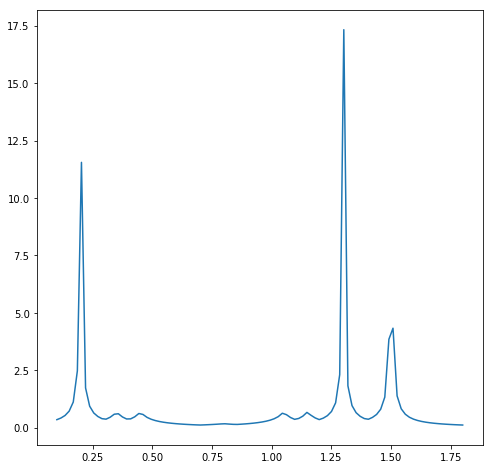

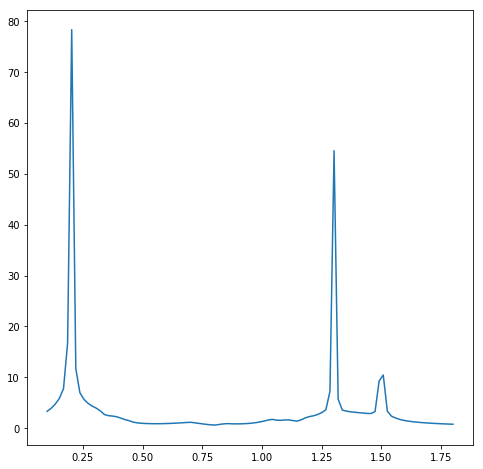

In [5]:
#linespace of data xj
x = np.linspace(min(X), max(X),100)

#Find distance of given data point and return k nearest neighbour
def dist(k,x):
    #find the distance or dubstract of each linespace data from 
    #the dataset. Then sort in assecnding order
    #and find kth smallest distance
    dist = [ np.sort(abs(X-xj))[k] for xj in x ]
    return np.array(dist)
k=7
N=X.shape[0]
d_arr = dist(k,x)

#Naive KNN
p = k/(2*N*d_arr)

#Kernal Gaussian
#Gaus funtion
gaus = lambda u: 1/np.sqrt(2*np.pi)*np.exp(-u**2/2)
#Work out the sum of the keneral for each linspace x data pt
K_sum = np.array([np.sum(gaus((x[j]-X)/d_arr[j])) for j in range(N)])
#Work out total prob disturbtion
p2=k/(2*N*d_arr)*K_sum

     
fig, axes = plt.subplots(figsize=(8, 8))
axes.plot(x,p)

fig, axes = plt.subplots(figsize=(8, 8))
axes.plot(x,p2)


## Multivariate density estimation

We can generalize everything to multivariate forms where the density function becomes:

$$ p(x) = \frac{1}{Nh^d}\sum_i^N K (\frac{x-x_i}{h})$$

where x is now more than 1 dimension. That's pretty much it, but care must be taken when doing nonparametric estimations in higher dimensions due to the cure of dimenstionality. Specifically if you you have 8 dimensions and small amount of data and bin it, you will find that those of those bins are going to be zero. 


## Classification using density estimations

With the density estimations the kernel estimation of the class-condtional denstiies ($p(x|C_i)$ is given as:

$$p(x|C_i) = \frac{1}{N_ih^d} \sum_t^N K(\frac{x-x_t}{h})r_{i,t}  $$

where $N_i$ is the number of points in that class, $r_{i,t}$ is 1 for $x_t$ which belong to class $C_i$ and 0 otherwise. The priors $P(C_i)$ are given as $N_i/N$. Thus using bayes theorm we gain the posteior proability as:

$$P(C_i|x) = \frac{\frac{1}{Nh^d} \sum_t^N K(\frac{x-x_t}{h})r_{i,t}}{\sum_k p(x|C_k)P(C_k)}  $$

Do to all the priors leading to a common $1/N$ factor they all cancel out to give:

$$P(C_i|x) = \frac{\sum_t^N K(\frac{x-x_t}{h})r_{i,t}}{\sum_k \sum_t^N K(\frac{x-x_t}{h})r_{k,t}}   $$ 


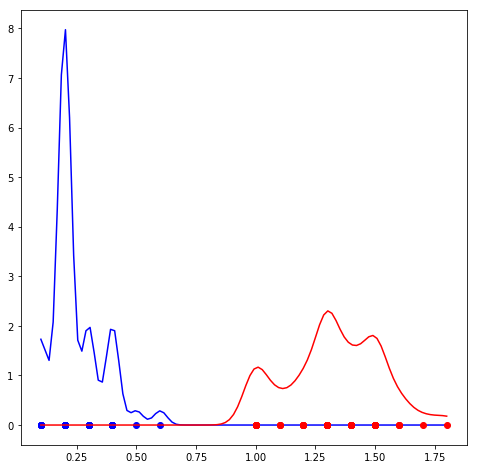

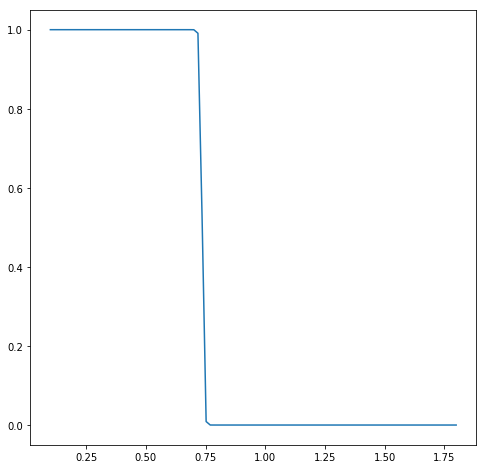

In [7]:
#new X data points using linspace
x = np.linspace(min(X), max(X),100)

#Build model using data
kmodel1 = gaussian_kde(X[Y==0],0.26)
kmodel2 = gaussian_kde(X[Y==1],0.26)


#determine liklehood of new x data P(x|Ci)
#excluding the common factor of 1/Nh
P1 = kmodel1(x)
P2 = kmodel2(x)
#Work out the prior
prior = P1/(P1+P2)



fig, axes = plt.subplots(figsize=(8, 8))

axes.plot(x,P1,'b')
axes.plot(X[Y==0],np.zeros(len(X[Y==0])),'bo')
axes.plot(x,P2,'r')
axes.plot(X[Y==1],np.zeros(len(X[Y==0])),'ro')

fig, axes2 = plt.subplots(figsize=(8, 8))
axes2.plot(x,prior)

# for ax,h in zip(axes.ravel(),width):
#     #build model
#     kmodel = gaussian_kde(X,)
#     #output pdf using x linspace data
#     pdfmodel = kmodel(x)
#     ax.plot(pdfmodel)
#     ax.set_title("Width(h): {}".format(round(h,4)))

### KNN classification
For KNN classfication using the same formula we did for density estimation, but in d dimensions we obtain the liklehood($p(x|C_i)$ as:

$$ P(x|C_i) = \frac{k_i}{N_iV^k(x)} $$

Where $V^k(x)$ is our distance or volume hypersphere measure of d dimensions centered at point x. This is typically equal to:

$$V^k=r^d a_d$$

where $a_{1,2,3,..,d} = 2,\pi,4\pi/3,...,etc$. And r is the distance metrics, with simple form of r=$|x-x_k|$, where $x_k$ is the kth nearest observations to x. in 2D you can see as a circle around the new data point x, with the circle radius being as long as the kth data point, a variable you  choose. 

$k_i$ is the number of neighbors or points that belong to class i and are contained within that circle(or volume) with centre point x.

It kind makes sense given point x, the probability of being in class i depends on number of points  surrounding x, more $k_i$ points surrounding x the more likelie we are in class i. With $N_i$ being a normalizing term to correct for points of certain classes which don't appear very often.  

The only problem is the probability is normalizable  as seen before is when volume is 0, the proability goes to infinity. Luckily we can factor some stuff out, using bayes theorm again the post prob becomes:

\begin{align}
P(C_i|x) &= \frac{P(x|C_i)P(C_i)}{\sum_j P(x|C_j)P(C_j)} \\
 &= \frac{\frac{k_i}{V^k(x)}}{\sum_j \frac{k_j}{V^k(x)}} \\
 &= \frac{k_i}{\sum_j k_j} \\ 
 &= \frac{k_i}{k} \\ 
\end{align}

And there we have it, we now have a voting system formula. Make a circle around data point x, and the class with the most k points wins, classifying point x.

Note the distance matrix r, can change to give better results, such as using the Mahalanobis distance making r:

$$ r(x) = (x − x_k)^TS_i^{-1}(x − x_k) $$

with $S_i$ being the covariance matrix. You can also learn distance using a supervised approach. 


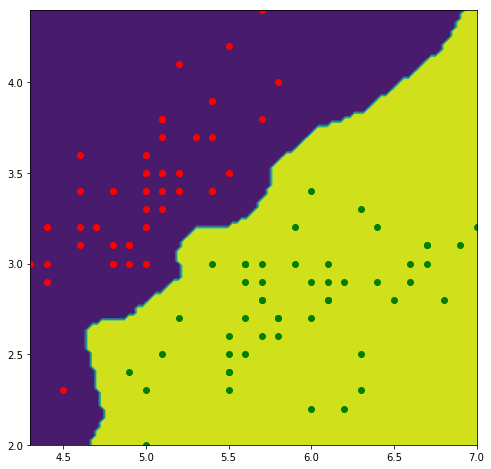

In [148]:
#First 2 features
X=iris.data[:, 0:2]
Y=iris.target
#only first 2 classes
X=X[Y!=2] 
Y=Y[Y!=2] 

#number of pts
k=5

#grid of data pts x
x, y = np.meshgrid(np.linspace(min(X[:,0]),max(X[:,0]),100), np.linspace(min(X[:,1]),max(X[:,1]),100))

#reshape data to 1D array for ease to use
xy = np.zeros((100**2,2))
xy[:,0],xy[:,1] = x.reshape(-1,),y.reshape(-1,)
                
# distance/norm function |x-xk|
def dist(X,x):
    return np.linalg.norm(X-x,axis=1)
    

#Given a certain pt x, determine which class it belongs too
def vote(k,x):
    #determine all dists with data model X
    #& sort to smallest dist up to k pts and return indices
    inds = np.argsort(dist(X,x))[:k]
    # how many pts belong to class 1 (classes either 0 or 1)
    Ki = len(np.where(Y[inds] == 1)[0])
    #Vote to see which class won
    if Ki/k > 0.5:
        return 1
    else:
        return 0

#Get votes of every xy data pt
Z = np.array([vote(k,xj) for xj in xy]).reshape(100,100)

#Plot
fig, axes = plt.subplots(figsize=(8, 8))
axes.contourf(x, y, Z)
axes.plot(X[:,0][Y==0],X[:,1][Y==0],'ro')
axes.plot(X[:,0][Y==1],X[:,1][Y==1],'go')


## Voronoi tesselation

A special case of a KNN is when k=1 and each point is classified as a seperate class. Here you find that each point falls into a seperate box. 

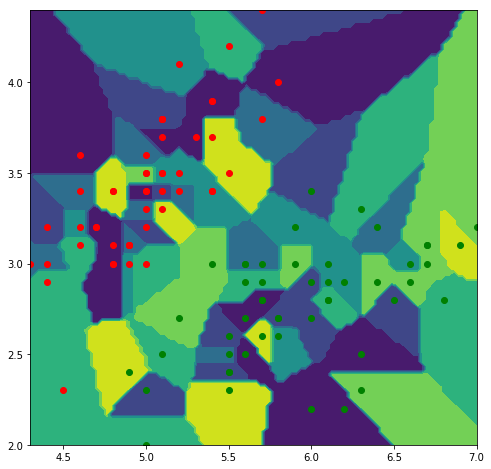

In [161]:
#make every X point a seperate class
Y_new = np.arange(len(X))
np.random.shuffle(Y_new)
X_new = X[Y_new]

#Given a certain pt x, determine which class it belongs too
#given k=1
def vote_self(k,x):
    #determine all dists with data model X
    #& get index of smallest dist
    inds = np.argmin(dist(X,x))
    # Determine class/pt belongs too
    return Y_new[inds]

#Get votes of every xy data pt
Z = np.array([vote_self(k,xj) for xj in xy]).reshape(100,100)

#Plot
fig, axes = plt.subplots(figsize=(8, 8))
axes.contourf(x, y, Z)
axes.plot(X[:,0][Y==0],X[:,1][Y==0],'ro')
axes.plot(X[:,0][Y==1],X[:,1][Y==1],'go')

## Nonparametric Regression
Just wanted to point out that this is a thing such as a running mean to smooth out the results. I might come back to in the future and do an example. 